# Transient Flow Assignment #

## Scenario ##
A large construction is to be realized next to a river that is in direct contact with the aquifer next to it. The building pit measures 50x50 m and river side is at 400 m distance from the river shore.

Transmissivity and storage coefficient are given.

  $$  kD = 900 \,m^2d^{-1} $$
   $$ S = 0.25 \,[-] $$
    
Two extraction wells are used at the corners of the building pit.

The drawdown everywhere in the building pit must be at least 5 m, to be reached within one month of pumping.

The pumping will continue after this month for 5 more months during which the drawdown is to be maintained. However the pumping can be reduced after the first month. Adjust the pumping once per month, such that at the end of each month the drawdown fullfils the requied 5 m.

After 6 months, pumping is stopped, so that the water levels can restore.

## Setup the situation, define the wells and observation point

$ Question: a) $ On which two corners of the builing pit should you place the two extraction wells to have most effect. 

$ Answer: $ Wells should be placed on the two corners nearest the river to counteract the effects of the recharge coming in from being in direct contact with the river.

$ Question: b) $ Find the most critical (observation) point and make sure that the drawdown is as required at that point.

$ Answer: $ Due to the inverse relation between drawdown, s and radial distance, the critical (observation) point for this pit was used as the top left corner of the building pit. 

The rationale behind this was using the calculation of net drawdown due to extraction using two points along the far side (from the river of the pit).

#### Point 1, midway between the far corners of the building pit: ####
$$ r_1 = r_2 $$
$$ \therefore r_1 + r_2 = 2 * \sqrt {50^2 + 25^2} = 111. 80 m $$

#### Point 2, at far corners of the building pit: ####
$$ r_1 = 50m r_2 = \sqrt {50^2 + 50^2}$$
$$ \therefore r_1 + r_2 = 50 m + \sqrt {50^2 + 50^2} = 120. 71 $$

To simulate the scenario river mirror wells are placed at the opposite side of the river, with opposite flow. This is done using the river as the mirror.

The Theis well drawdown is

$$ s = \frac {Q_0} {4 \pi kD} W(u) $$

where

$$ W(u) = exp1(u)$$

the exponential integral, and

$$ u = \frac {r^2 S} { 4 kD t} $$

as drawdown, s is known, rearranging for Q gives:

$$ {Q_0} = \frac {4 \pi kD s} {W(u)} $$ 

The river is assumed to be straight along the y axis, and that the wells are at points ($-a,\, 0$) and ($-a,\, b$) and with known drawdown of $s=5$ m at critical point at time $t=30$ days. The mirror wells with opposite flow is at location ($+a,\, 0$) and ($+a,\, b$).

$$ Thus, \, {Q_0} = \frac {4 \pi kD s} {W(u1) + W(u2) - W(u3) - W(u4)} $$

In [2]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from scipy.special import exp1 # Theis well function
from scipy.special import erfc
W = sp.exp1

## Calculating pumping rate ##

In [5]:
kD = 900 #m2/d
S = 0.25 # [-]
t = 30.0 #days
a = 400 # m, distance from river to well
b = 50 # m, length of side
s = 5.0 # m, drawdown at critical point

# the locations of wells, mirror wells and observation points
x1, y1 = -a, 0 # location of extraction well 1 
x2, y2 = -a, b # location of extraction well 2
x3, y3 = +a, 0  # location of mirror well 1
x4, y4 = +a, b  # location of mirror well 2
x0, y0 = (a + b), b  # location of observation point (top left corner of pit)

r1 = np.sqrt((x1 - x0)**2 + (y1 - y0)**2)
r2 = np.sqrt((x2 - x0)**2 + (y2 - y0)**2)
r3 = np.sqrt((x3 - x0)**2 + (y3 - y0)**2)
r4 = np.sqrt((x4 - x0)**2 + (y4 - y0)**2)

u1 = r1 ** 2 * S / (4 * kD * t)
u2 = r2 ** 2 * S / (4 * kD * t)
u3 = r3 ** 2 * S / (4 * kD * t)
u4 = r4 ** 2 * S / (4 * kD * t)

# Pumping rate
Q = -4 * np.pi * kD * s / (W(u1) + W(u2) - W(u3) - W(u4)) 

print("The pumping rate, Q at x0={:.1f}, y0={:.1f} at t={:.2f} d with s ={:.2f} m equals  Qo ={:.2f} m^3/d"\
      .format(x0, y0, t, s, Q))                       

The pumping rate, Q at x0=450.0, y0=50.0 at t=30.00 d with s =5.00 m equals  Qo =6797.29 m^3/d


### Drawdown threshold and new pumping rate to apply during month ###

The pumping rate, $Q_0$ to maintain 5m at the critical point is 6797.29 $m^{3}/d$ 

To find pumping rate for monthly change in drawdown rate a threshold value of 5.25m is set at maximum drawdown, s at critical point. A drawdown value of $5.24\, m$ was calculated $9 \,days$ into the following month with a pumping rate $Q_0 = 6797.29 m^3/d$.

In [3]:
kD = 900 # m2/d
S = 0.25 # [-]
x0 = 450 # m # distance from river
Q = 6800 # m3/d, extraction of the real well
#r0 = 0.25 # well radius
t = 39.0 # d
a = 400 # m distance between well and river shore

# locations of well, mirror well an observation points
x1, y1 = -a, 0.  # location of extraction well
x2, y2 = +a, 0.  # location of mirror well
x3, y3 = -a, 50.
x4, y4 = +a, 50
x0, y0 = 450., 50.  # location of observation point

r1 = np.sqrt((x1 - x0)**2 + (y1 - y0)**2)
r2 = np.sqrt((x2 - x0)**2 + (y2 - y0)**2)
r3 = np.sqrt((x3 - x0)**2 + (y3 - y0)**2)
r4 = np.sqrt((x4 - x0)**2 + (y4 - y0)**2)

u1 = r1 ** 2 * S / (4 * kD * t)
u2 = r2 ** 2 * S / (4 * kD * t)
u3 = r3 ** 2 * S / (4 * kD * t)
u4 = r4 ** 2 * S / (4 * kD * t)

# drawdown
s = Q /(4 * np.pi * kD) * (W(u1) - W(u2) + W(u3) - W(u4)) # minus because mirror well has opposite Q

print("The ddn s at x0={:.1f}, y0={:.1f} at t={:.2f} d with Q={:.0f} m3/d equals {:.2f} m"\
      .format(x0, y0, t, Q, s))

The ddn s at x0=450.0, y0=50.0 at t=39.00 d with Q=6800 m3/d equals -5.24 m


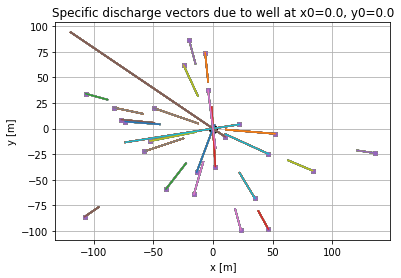

In [4]:
#flow direction
Q0 = 6800 # m3/d Well
x0, y0 = 0., 0.  # the location of the well

# The random observation points
a = 50 # m  a length to scale randomly chosen points
x = a * (np.random.randn(25) - 0.5)  # choose 25 random values
y = a * (np.random.randn(25) - 0.5)  # same

# Distance from each point to the well
r = np.sqrt((x-x0)**2 + (y-y0)**2)

# u
u = r**2 * S /(4 * kD * t)

# the specific discharge
q = Q0 / (2 * np.pi * r) * np.exp(-u) # m2/d
alpha = np.arctan2(y - y0, x- x0) # angle between vector and horizontal
qx = q * np.cos(alpha)   # x component of specific discharge
qy = q * np.sin(alpha)   # y component of specific discharge

scale = 2.0 # scale factor to plot specific discharge vectors

# plot the location of the well as  black ('k') circle ('o') of size 8
plt.plot(x0, y0, 'ko', markersize=8)

# in a loop, plot one vector after another
for xx, yy, qxx, qyy in zip(x, y, qx, qy):
    plt.plot(x, y, 'o', markersize=4)    # plot marker at obs. point
    plt.plot([x, x - scale * qx], [y, y - scale * qy]) # plot vector

# embelishment of the plot
plt.title ('Specific discharge vectors due to well at x0={:.1f}, y0={:.1f}'\
         .format(x0, y0))
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.grid()

# show it all
plt.show()

In [5]:
Q0 = 6800 # m3/d
kD = 900 # m2/d
S  = 0.25 # [-]

# all variable that are constant in time:

b = 400 # m, distance of well to river shore
x1, y1 = -b, 0 # location of well
x2, y2 = +b, 0 # location of mirror well
x3, y3 = -b, 50
x4, y4 = +b, 50

# all parameters that are constant in time 
y = np.linspace(-1000, 1000, 81)
x = np.zeros_like(y)

dy = y[1:] - y[:-1]

r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)
r3 = np.sqrt((x - x3) ** 2 + (y - y3) ** 2)
r4 = np.sqrt((x - x4) ** 2 + (y - y4) ** 2)

alpha1 = np.arctan2(y, x - x1)
alpha2 = np.arctan2(y, x - x2)
alpha3 = np.arctan2(y, x - x3)
alpha4 = np.arctan2(y, x - x4)
print()

# Set the times when pumping switches
#              start, end, step
month = np.arange(1, 18, 1) # month numbers at which flow switches
                            #counting from Jan 1 in first year
Tsw = 30 * month   # t at which flow switches in days

# set the pumping flow at the switch points
Qsw = Q0 * 2 * (-1) ** np.arange(len(Tsw))
Qsw[0] = Q0

# Show them
print('{:>6} {:>6}'.format('Tsw[d]', 'Qsw'))
for tsw, Q in zip(Tsw, Qsw):
    print('{:6.0f} {:6.0f}'.format(tsw, Q))


Tsw[d]    Qsw
    30   6800
    60 -13600
    90  13600
   120 -13600
   150  13600
   180 -13600
   210  13600
   240 -13600
   270  13600
   300 -13600
   330  13600
   360 -13600
   390  13600
   420 -13600
   450  13600
   480 -13600
   510  13600


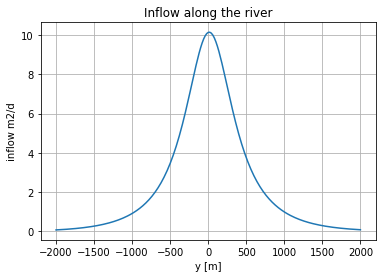

Total inflow with Q=6800 at t=180.0 d equals 9793.8 m3/d


In [6]:
# total inflow along river

Q = 6800 # m3/d

a = 50 # m, length of side
b = 400 # m, distance of well to river shore
t = 180 #d, inflow for the 6 months

x1, y1 = -b, 0 # location of well 1
x2, y2 = +b, 0 # location of mirror well 1
x3, y3 = -b, a # location of well 2 
x4, y4 = +b, a # location of mirror well 2

y = np.linspace(-2000, 2000, 201)
x = np.zeros_like(y)

r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)
r3 = np.sqrt((x - x3) ** 2 + (y - y3) ** 2)
r4 = np.sqrt((x - x4) ** 2 + (y - y4) ** 2)

u1 = r1 ** 2 * S / (4 * kD * t)
u2 = r2 ** 2 * S / (4 * kD * t)
u3 = r3 ** 2 * S / (4 * kD * t)
u4 = r4 ** 2 * S / (4 * kD * t)

q1 = +Q / (2 * np.pi * r1) * np.exp(-u1)
q2 = -Q / (2 * np.pi * r2) * np.exp(-u2)
q3 = +Q / (2 * np.pi * r3) * np.exp(-u3)
q4 = -Q / (2 * np.pi * r4) * np.exp(-u4)

alpha1 = np.arctan2(y, x - x1)
alpha2 = np.arctan2(y, x - x2)
alpha1 = np.arctan2(y, x - x3)
alpha2 = np.arctan2(y, x - x4)

qx = q1 * np.cos(alpha1) + q2 * np.cos(alpha2)
qy = q1 * np.sin(alpha1) + q2 * np.sin(alpha2)
qx1 = q3 * np.cos(alpha1) + q4 * np.cos(alpha2)
qy1 = q3 * np.sin(alpha1) + q4 * np.sin(alpha2)

qin = qx + qx1

plt.title('Inflow along the river')
plt.xlabel('y [m]')
plt.ylabel('inflow m2/d')
plt.grid()
plt.plot(y, qin)
plt.show()

dy = y[1:] - y[:-1]
qm = 0.5 * (qin[:-1] + qin[1:])
Qin = np.sum(qm * dy)
print('Total inflow with Q={:.0f} at t={:.1f} d equals {:.1f} m3/d'\
     .format(Q, t, Qin))

## Flow from the river into the groundwater system

$ Question: $ Compute as a function of time the flow from the river into the groundwater system. It is assumed that the groundwater head is initially uniform and equal to the river stage (water level in the river). Do this for the average flow during the 6 month of building pit operation (ignore the variation in the extraction for simplicity).

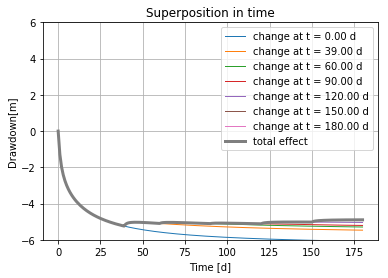

In [12]:
#Superposition in time

kD = 900 # m2/d
S = 0.25 # [-]

# using arrays instead of lists is convenient in computations
Q     = np.array([6800.0, 6100, 5900, 5800, 5600, 5400, 5200, 0]) # pumping rate [m]
dQ    = np.hstack((Q[0], np.diff(Q))) # hstack = glue together
times = np.array([0,  39,  60, 90, 120, 150, 180]) # days, stage jump moments
b = 400 # distance to be considered

x1, y1 = -b, 0 # location of well 1
x2, y2 = +b, 0 # location of mirror well 1
x3, y3 = -b, 50 # location of well 2 
x4, y4 = +b, 50 # location of mirror well 2
x0, y0 = 450, 50 # critical point

r1 = np.sqrt((x0 - x1) ** 2 + (y0 - y1) ** 2) #distance between well 1 from crit. pt
r2 = np.sqrt((x0 - x2) ** 2 + (y0 - y2) ** 2) #distance between mirror well 1 amd crit. pt
r3 = np.sqrt((x0 - x3) ** 2 + (y0 - y3) ** 2) #distance between well two and crit. pt
r4 = np.sqrt((x0 - x4) ** 2 + (y0 - y4) ** 2) #distance between mirror well 2 and crit. pt

# The 0.00001 prevents division by zero.
# time values to be plotted
t = np.linspace(0, 180, 181) + 0.00001 # period to be considered (1 year after drawdown ceases)

# total groundwater change
s = np.zeros_like(t) # set initially to zero

# Loop over all stage changes
for tt, dq in zip(times, dQ):
    u1 = r1 ** 2 * S / (4 * kD * (t[t>=tt] - tt))
    u2 = r2 ** 2 * S / (4 * kD * (t[t>=tt] - tt))
    u3 = r3 ** 2 * S / (4 * kD * (t[t>=tt] - tt))
    u4 = r4 ** 2 * S / (4 * kD * (t[t>=tt] - tt))
    
    ds = np.zeros_like(t) # set all values to zero
    ds[t>=tt] = dq * (1/(4 * np.pi * kD))*((W(u1)-W(u2))+((W(u3)-W(u4)))) # only values t>=tt
    s = (s + ds) # add change due to this stage to total
    plt.plot(t, s, lw=1, label= 'change at t = {:.02f} d'.format(tt))
    
plt.plot(t, s, linewidth=3, label='total effect')    
plt.title('Superposition in time')
plt.xlabel('Time [d]')
plt.ylabel('Drawdown[m]')
plt.ylim(-6, 6)
plt.legend()
plt.grid()
plt.show()

#print('drawdown for Q={} m^3/d at t={} days equals s{}m'.format(Q, t, s))

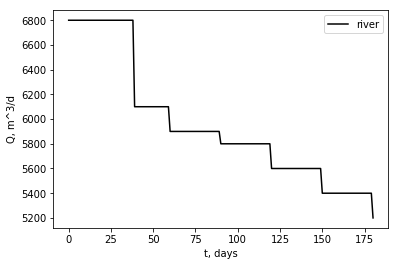

In [8]:
# to also plot the river stage itself,
# first generate values for graph of river stage
a = np.zeros_like(t)  # initially zero
for aa, tt in zip(Q, times):
    a[t>=tt] = aa

    
plt.plot(t, a, 'k', label='river') # plot the river stage
plt.xlabel('t, days')
plt.ylabel('Q, m^3/d')
plt.legend()
plt.show()

## Impact of the month-long wave in the river stage

Use this section to show the effect of the wave in the river. Specifiy it, explain what and how you do it.

And finally compare what can be done by pomping to compensate the impact of the wave at the critical point in the building pit.

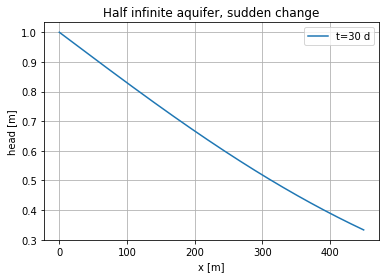

After 30.0 days the head change s, at critical point (x = 450m)  equals 0.33 m


In [9]:
kD = 900 # m2/d Transmissivity (given)
S = 0.25 # [-] Storage coefficient or storativity (given)
A = 1. #m change in height due to month long wave (given)

x = np.linspace(0, 450, 451) #distance between river and critical point at 1 m intervals
t = 30 # day - duration of the wave
plt.title ('Half infinite aquifer, sudden change')
plt.xlabel ('x [m]')
plt.ylabel ('head [m]')
plt.grid ()

s = A * erfc (x * np.sqrt(S/ (4 * kD * t))) #calculating the drawdown for all values of x from the river to the crit. pt
plt.plot (x, s, label= 't={} d'.format(t)) #plotting the graph drawdown vs distance 

s450 = A * erfc (450*np.sqrt(S/ (4*kD*t))) # drawdown for x = 450
plt.legend()
plt.show()
print('After {:.1f} days the head change s, at critical point (x = 450m)  equals {:.02f} m'\
     .format(t, s450)) #displays value of drawdown at critical point

To compensate for the impact of the month long wave, the pumping rate will be increased to mitigate the impact of the wave
at the critical point.

Since wave happens for the 4th month of extraction, then discharge will be calculated using the formula:

Formula will be used to calculate discharge drawdown of 5.33 during 4th month.